# Dependencies

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [ ]:
# Local Data analysis

In [3]:
# Set filepaths
csv_filepath1 = "raw data/MergedData.csv"

In [4]:
# Read the csv files into new dataframe
df = pd.read_csv(csv_filepath1, encoding="iso-8859-1", low_memory=False)
df.head()

,Animal ID,Name_intake,DateTime_intake,Found Location,Intake Type,Intake Condition,Animal Type_intake,Sex upon Intake,Age upon Intake,Breed_intake,...,Sex_outcome,Female_outcome,Male_outcome,SpayNeuter_outcome,Purebred_outcome,NumAge_outcome,AgeUnits_outcome,AgeDays_outcome,Intake Outcome Days,IODays
0,A748291,*Madison,2017-05-01 14:26:00,S Pleasant Valley Rd And E Riverside Dr in Aus...,Stray,Normal,Dog,Intact Female,10 months,Pit Bull Mix,...,Female,1.0,0.0,Yes,0,1.0,year,365.0,125 days 09:34:00.000000000,125.0
1,A750529,NaN,2017-05-28 13:22:00,8312 North Ih 35 in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Miniature Schnauzer Mix,...,Female,1.0,0.0,Yes,0,5.0,month,150.0,4 days 03:20:00.000000000,4.0
2,A730601,NaN,2016-07-07 12:11:00,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,7 months,Domestic Shorthair Mix,...,Male,0.0,1.0,Yes,0,7.0,month,210.0,0 days 20:49:00.000000000,0.0
3,A748238,NaN,2017-05-01 10:53:00,Airport Blvd And Oak Springs Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 years,Bichon Frise Mix,...,Male,0.0,1.0,Yes,0,3.0,year,1095.0,5 days 05:04:00.000000000,5.0
4,A683644,*Zoey,2014-07-13 11:02:00,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,4 weeks,Border Collie Mix,...,Female,1.0,0.0,Yes,0,4.0,month,120.0,115 days 23:04:00.000000000,115.0


In [5]:
print(df.columns)

Index(['Animal ID', 'Name_intake', 'DateTime_intake', 'Found Location',
       'Intake Type', 'Intake Condition', 'Animal Type_intake',
       'Sex upon Intake', 'Age upon Intake', 'Breed_intake', 'Color_intake',
       'Month_intake', 'Year_intake', 'Sex_intake', 'Female_intake',
       'Male_intake', 'SpayNeuter_intake', 'Purebred_intake', 'NumAge_intake',
       'AgeUnits_intake', 'AgeDays_intake', 'Name_outcome', 'DateTime_outcome',
       'Date of Birth', 'Outcome Type', 'Outcome Subtype',
       'Animal Type_outcome', 'Sex upon Outcome', 'Age upon Outcome',
       'Breed_outcome', 'Color_outcome', 'Month_outcome', 'Year_outcome',
       'Sex_outcome', 'Female_outcome', 'Male_outcome', 'SpayNeuter_outcome',
       'Purebred_outcome', 'NumAge_outcome', 'AgeUnits_outcome',
       'AgeDays_outcome', 'Intake Outcome Days', 'IODays'],
      dtype='object')


In [6]:
# Get metrics on the raw outcomes file
df.describe()

,Month_intake,Year_intake,Female_intake,Male_intake,Purebred_intake,NumAge_intake,AgeDays_intake,Month_outcome,Year_outcome,Female_outcome,Male_outcome,Purebred_outcome,NumAge_outcome,AgeDays_outcome,IODays
count,57593.000000,57593.000000,57592.000000,57592.000000,57593.000000,57593.000000,57593.000000,57593.000000,57593.000000,57591.000000,57591.000000,57593.000000,57588.000000,57593.000000,57369.000000
mean,6.708697,2015.260709,0.462425,0.490294,0.048947,3.457382,742.241818,6.850589,2015.294480,0.462416,0.490302,0.048947,3.557599,756.069627,16.597588
std,3.210898,1.210101,0.498590,0.499910,0.215759,2.936187,1087.364762,3.262525,1.207164,0.498590,0.499910,0.215759,2.929233,1089.431333,37.431327
min,1.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2014.000000,0.000000,0.000000,0.000000,1.000000,30.000000,4.000000,2014.000000,0.000000,0.000000,0.000000,2.000000,60.000000,1.000000
50%,7.000000,2015.000000,0.000000,0.000000,0.000000,2.000000,365.000000,7.000000,2015.000000,0.000000,0.000000,0.000000,2.000000,365.000000,5.000000
75%,9.000000,2016.000000,1.000000,1.000000,0.000000,4.000000,730.000000,10.000000,2016.000000,1.000000,1.000000,0.000000,5.000000,730.000000,14.000000
max,12.000000,2017.000000,1.000000,1.000000,1.000000,22.000000,8030.000000,12.000000,2017.000000,1.000000,1.000000,1.000000,22.000000,8030.000000,1101.000000


In [7]:
#Metrics cont'd
data_recs = len(df)
data_AnimalTypes = df.groupby(["Animal Type_intake"]).size()
data_Sex = df.groupby(["Animal Type_intake", "Sex_intake"]).size()
data_Intake = df.groupby(["Animal Type_intake", "Intake Type"]).size()
data_Yearly = df.groupby(["Year_intake"]).size()
data_Yearly_Intake = df.groupby(["Animal Type_intake", "Intake Type", "Year_intake"]).size()
data_Monthly_Intake = df.groupby(["Animal Type_intake", "Intake Type", "Month_intake"]).size()
data_Outcome = df.groupby(["Animal Type_intake", "Outcome Type"]).size()

print(f"Number of records in Merged file: {data_recs}")
print(f"Number of Animal Type: {data_AnimalTypes}")
print(f"Number of Animals by Type and Sex: {data_Sex}")
print(f"Number of Animals by Type and Intake Reason: {data_Intake}")
print(f"Number of Animal Intakes by Year {data_Yearly}")
print(f"Number of Animals by Type and Outcome: {data_Outcome}")

Number of records in Merged file: 57593
Number of Animal Type: Animal Type_intake
Cat    25896
Dog    31697
dtype: int64
Number of Animals by Type and Sex: Animal Type_intake  Sex_intake 
Cat                 Female         11909
                    Male           11474
                    Unknown Sex     2513
Dog                 Female         14723
                    Male           16763
                    Unknown Sex      210
dtype: int64
Number of Animals by Type and Intake Reason: Animal Type_intake  Intake Type       
Cat                 Euthanasia Request       50
                    Owner Surrender        4313
                    Public Assist           558
                    Stray                 20975
Dog                 Euthanasia Request      169
                    Owner Surrender        4913
                    Public Assist          2736
                    Stray                 23879
dtype: int64
Number of Animal Intakes by Year Year_intake
2013     3406
2014    14723

In [8]:
#Filter out partial year data for 2013
df = df[df["Year_intake"]>2013]

#Verify data set yearly sample size
data_Yearly = df.groupby(["Year_intake"]).size()
print(f"Number of Animal Intakes by Year {data_Yearly}")

Number of Animal Intakes by Year Year_intake
2014    14723
2015    14590
2016    13198
2017    11676
dtype: int64


In [9]:
dogs_df = df[df["Animal Type_intake"]=="Dog"]
cats_df = df[df["Animal Type_intake"]=="Cat"]

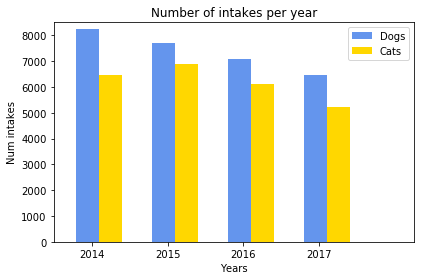

In [10]:
#Chart total intakes per year

dogsYrGrp = dogs_df.groupby(["Year_intake"], as_index=False)
dogsYrCnt = dogsYrGrp["Animal ID"].count()
dogsYears = dogsYrCnt["Year_intake"]
dogCnt = dogsYrCnt["Animal ID"]

catYrGrp = cats_df.groupby(["Year_intake"], as_index=False)
catYrCnt = catYrGrp["Animal ID"].count()
catCnt = catYrCnt["Animal ID"]

x_axis = np.arange(0, len(dogsYears), 1)
w = 0.3
plt.figure(figsize=(6,4))

plt.bar(x_axis-0.3, dogCnt,width=w,color='cornflowerblue',align='center', label="Dogs")
plt.bar(x_axis, catCnt,width=w,color='gold',align='center', label="Cats")
plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value-0.25 for value in x_axis]
plt.xticks(tick_locations, dogsYears)

# Set the limits of the x axis
plt.xlim(-.75, len(x_axis))

# Set the limits of the y axis
plt.ylim(0, 8500)

# Give the chart a title, x label, and y label
plt.title(f"Number of intakes per year")
plt.xlabel("Years")
plt.ylabel("Num intakes")

plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)

plt.tight_layout()
plt.savefig("figures/Intakes_Year.png")
plt.show()

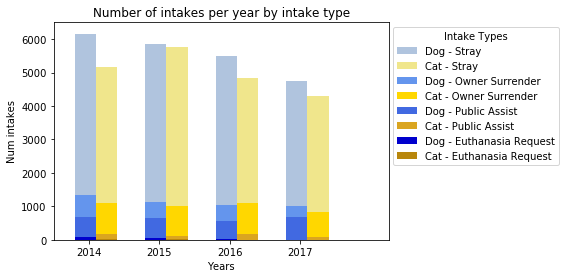

In [11]:
#Chart total intakes by type per year

Years = df["Year_intake"].unique()
intakeTypes = df["Intake Type"].unique()
dogColors = ["lightsteelblue","cornflowerblue","royalblue","mediumblue","darkblue","slateblue","blueviolet"]
catColors = ["khaki","gold","goldenrod","darkgoldenrod","darkkhaki","olive","darkolive"]
colorCnt = 0

plt.figure(figsize=(6,4))

for iType in intakeTypes:
    idogs_df = dogs_df[dogs_df["Intake Type"]==iType]
    dogsYrGrp = idogs_df.groupby(["Year_intake"], as_index=False)
    dogsYrCnt = dogsYrGrp["Animal ID"].count()
    dogCnt = dogsYrCnt["Animal ID"]
    
    icats_df = cats_df[cats_df["Intake Type"]==iType]
    catsYrGrp = icats_df.groupby(["Year_intake"], as_index=False)
    catsYrCnt = catsYrGrp["Animal ID"].count()
    catCnt = catsYrCnt["Animal ID"]
    
    x_axis = np.arange(0, len(Years), 1)
   
    plt.bar(x_axis-0.3, dogCnt,width=w,color=dogColors[colorCnt],align='center', label="Dog - "+iType)
    plt.bar(x_axis, catCnt,width=w,color=catColors[colorCnt],align='center', label="Cat - "+iType)
    colorCnt += 1

lgd=plt.legend(bbox_to_anchor=(1.525, 1), loc='upper right', ncol=1, title="Intake Types") 

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value-0.25 for value in x_axis]
plt.xticks(tick_locations, dogsYears)

# Set the limits of the x axis
plt.xlim(-.75, len(x_axis))

# Set the limits of the y axis
plt.ylim(0, 6500)

# Give the chart a title, x label, and y label
plt.title(f"Number of intakes per year by intake type")
plt.xlabel("Years")
plt.ylabel("Num intakes")

#plt.tight_layout()
plt.savefig("figures/Intakes_Type_Year.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

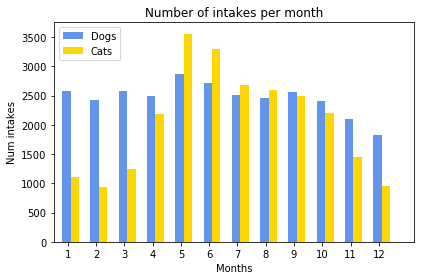

In [12]:
#Chart total intakes per Month of year

dogsMoGrp = dogs_df.groupby(["Month_intake"], as_index=False)
dogsMoCnt = dogsMoGrp["Animal ID"].count()
dogsMonths = dogsMoCnt["Month_intake"]
dogCnt = dogsMoCnt["Animal ID"]

catMoGrp = cats_df.groupby(["Month_intake"], as_index=False)
catMoCnt = catMoGrp["Animal ID"].count()
catCnt = catMoCnt["Animal ID"]

plt.figure(figsize=(6,4))
x_axis = np.arange(0, len(dogsMonths), 1)

plt.bar(x_axis-0.3, dogCnt,width=w,color='cornflowerblue',align='center', label="Dogs")
plt.bar(x_axis, catCnt,width=w,color='gold',align='center', label="Cats")
plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value-0.25 for value in x_axis]
plt.xticks(tick_locations, dogsMonths)

# Set the limits of the x axis
plt.xlim(-.75, len(x_axis))

# Set the limits of the y axis
plt.ylim(0, 3750)

# Give the chart a title, x label, and y label
plt.title(f"Number of intakes per month")
plt.xlabel("Months")
plt.ylabel("Num intakes")

plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)

plt.tight_layout()
plt.savefig("figures/Intakes_Month.png")
plt.show()

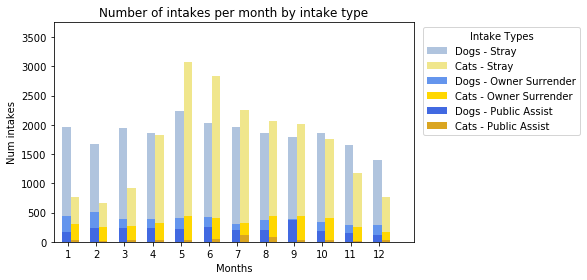

In [13]:
#Chart total intakes by type per month

MintakeTypes =["Stray","Owner Surrender", "Public Assist", ]
colorCnt = 0
plt.figure(figsize=(6,4))

for iType in MintakeTypes:
    idogs_df = dogs_df[dogs_df["Intake Type"]==iType]
    dogsMoGrp = idogs_df.groupby(["Month_intake"], as_index=False)
    dogsMoCnt = dogsMoGrp["Animal ID"].count()
    dogsMonths = dogsMoCnt["Month_intake"]
    dogCnt = dogsMoCnt["Animal ID"]
    
    icats_df = cats_df[cats_df["Intake Type"]==iType]
    catMoGrp = icats_df.groupby(["Month_intake"], as_index=False)
    catMoCnt = catMoGrp["Animal ID"].count()
    catCnt = catMoCnt["Animal ID"]
    
    x_axis = np.arange(0, len(dogsMonths), 1)

    plt.bar(x_axis-0.3, dogCnt,width=w,color=dogColors[colorCnt],align='center', label="Dogs - "+iType)
    plt.bar(x_axis, catCnt,width=w,color=catColors[colorCnt],align='center', label="Cats - "+iType)
   
    colorCnt += 1

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value-0.25 for value in x_axis]
plt.xticks(tick_locations, dogsMonths)

# Set the limits of the x axis
plt.xlim(-.75, len(x_axis))

# Set the limits of the y axis
plt.ylim(0, 3750)

# Give the chart a title, x label, and y label
plt.title(f"Number of intakes per month by intake type")
plt.xlabel("Months")
plt.ylabel("Num intakes")

lgd=plt.legend(bbox_to_anchor=(1.475, 1), loc='upper right', ncol=1, title="Intake Types")

plt.tight_layout()
plt.savefig("figures/Intakes_Type_Month.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

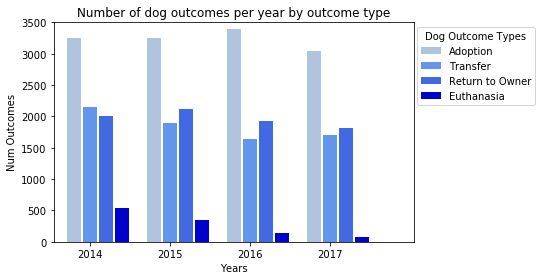

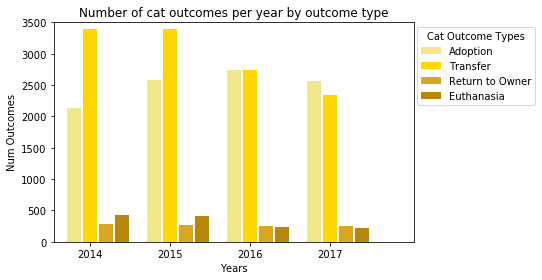

In [14]:
#Chart total outcomes by type per year

Years = df["Year_outcome"].unique()
outcomeTypes = ["Adoption","Transfer","Return to Owner","Euthanasia"]

colorCnt = 0
w=0
plt.figure(figsize=(6,4))

for iType in outcomeTypes:
    idogs_df = dogs_df[dogs_df["Outcome Type"]==iType]
    dogsYrGrp = idogs_df.groupby(["Year_outcome"], as_index=False)
    dogsYrCnt = dogsYrGrp["Animal ID"].count()
    dogsYears = dogsYrCnt["Year_outcome"]
    dogCnt = dogsYrCnt["Animal ID"]
    
    x_axis = np.arange(0, len(dogsYears), 1)
   
    plt.bar(x_axis+w, dogCnt,width=0.175,color=dogColors[colorCnt],align='center', label=iType)
    #plt.bar(x_axis, catCnt,width=w,color=catColors[colorCnt],align='center', label="Cat - "+iType)
    colorCnt += 1
    w+=0.2

lgd=plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1, title="Dog Outcome Types") 

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value+0.2 for value in x_axis]
plt.xticks(tick_locations, dogsYears)

# Set the limits of the x axis
plt.xlim(-.25, len(x_axis)+.25)

# Set the limits of the y axis
plt.ylim(0, 3500)

# Give the chart a title, x label, and y label
plt.title(f"Number of dog outcomes per year by outcome type")
plt.xlabel("Years")
plt.ylabel("Num Outcomes")

plt.tight_layout()
plt.savefig("figures/Outcomes_Dog_Year.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


# --- Cats  ---
colorCnt = 0
w=0
plt.figure(figsize=(6,4))

for iType in outcomeTypes:
    icats_df = cats_df[cats_df["Outcome Type"]==iType]
    catsYrGrp = icats_df.groupby(["Year_outcome"], as_index=False)
    catsYrCnt = catsYrGrp["Animal ID"].count()
    catsYears = catsYrCnt["Year_outcome"]
    catCnt = catsYrCnt["Animal ID"]
        
    x_axis = np.arange(0, len(catsYears), 1)
   
    plt.bar(x_axis+w, catCnt,width=0.175,color=catColors[colorCnt],align='center', label=iType)
    colorCnt += 1
    w+=0.2

lgd=plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1, title="Cat Outcome Types") 

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value+0.2 for value in x_axis]
plt.xticks(tick_locations, dogsYears)

# Set the limits of the x axis
plt.xlim(-.25, len(x_axis)+.25)

# Set the limits of the y axis
plt.ylim(0, 3500)

# Give the chart a title, x label, and y label
plt.title(f"Number of cat outcomes per year by outcome type")
plt.xlabel("Years")
plt.ylabel("Num Outcomes")

plt.tight_layout()
plt.savefig("figures/Outcomes_Cat_Year.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

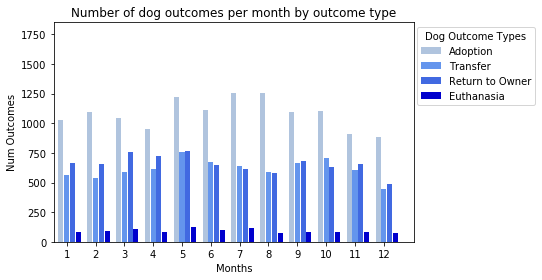

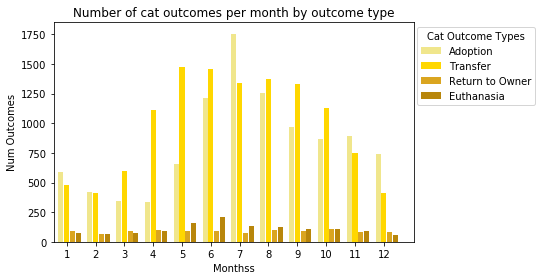

In [15]:
#Chart total outcomes by type per month

Months = df["Month_outcome"].unique()
outcomeTypes = ["Adoption","Transfer","Return to Owner","Euthanasia"]

colorCnt = 0
w=0
plt.figure(figsize=(6,4))

for iType in outcomeTypes:
    idogs_df = dogs_df[dogs_df["Outcome Type"]==iType]
    dogsMoGrp = idogs_df.groupby(["Month_outcome"], as_index=False)
    dogsMoCnt = dogsMoGrp["Animal ID"].count()
    dogsMonths = dogsMoCnt["Month_outcome"]
    dogCnt = dogsMoCnt["Animal ID"]
    
    x_axis = np.arange(0, len(dogsMonths), 1)
   
    plt.bar(x_axis+w, dogCnt,width=0.175,color=dogColors[colorCnt],align='center', label=iType)
    colorCnt += 1
    w+=0.2

lgd=plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1, title="Dog Outcome Types") 

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value+0.2 for value in x_axis]
plt.xticks(tick_locations, dogsMonths)

# Set the limits of the x axis
plt.xlim(-.25, len(x_axis)+.25)

# Set the limits of the y axis
plt.ylim(0, 1850)

# Give the chart a title, x label, and y label
plt.title(f"Number of dog outcomes per month by outcome type")
plt.xlabel("Months")
plt.ylabel("Num Outcomes")

plt.tight_layout()
plt.savefig("figures/Outcomes_Dog_Month.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


# --- Cats  ---
colorCnt = 0
w=0
plt.figure(figsize=(6,4))

for iType in outcomeTypes:
    icats_df = cats_df[cats_df["Outcome Type"]==iType]
    catsMoGrp = icats_df.groupby(["Month_outcome"], as_index=False)
    catsMoCnt = catsMoGrp["Animal ID"].count()
    catsMonths = catsMoCnt["Month_outcome"]
    catCnt = catsMoCnt["Animal ID"]
        
    x_axis = np.arange(0, len(catsMonths), 1)
   
    plt.bar(x_axis+w, catCnt,width=0.175,color=catColors[colorCnt],align='center', label=iType)
    colorCnt += 1
    w+=0.2

lgd=plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1, title="Cat Outcome Types") 

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value+0.2 for value in x_axis]
plt.xticks(tick_locations, catsMonths)

# Set the limits of the x axis
plt.xlim(-.25, len(x_axis)+.25)

# Set the limits of the y axis
plt.ylim(0, 1850)

# Give the chart a title, x label, and y label
plt.title(f"Number of cat outcomes per month by outcome type")
plt.xlabel("Monthss")
plt.ylabel("Num Outcomes")

plt.tight_layout()
plt.savefig("figures/Outcomes_Cat_Month.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

Adoption    Year_outcome     IODays
0          2014  20.660215
1          2015  22.893231
2          2016  25.807885
3          2017  22.886259
Transfer    Year_outcome     IODays
0          2014  10.854944
1          2015  10.922085
2          2016  13.532515
3          2017   9.853586
Return to Owner    Year_outcome    IODays
0          2014  3.202891
1          2015  2.956377
2          2016  3.011936
3          2017  2.896169
Euthanasia    Year_outcome     IODays
0          2014   8.310536
1          2015   7.505714
2          2016  24.422222
3          2017  16.742857


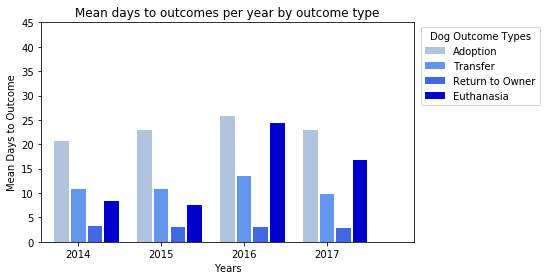

Adoption    Year_outcome     IODays
0          2014  30.577049
1          2015  38.731650
2          2016  43.099526
3          2017  39.520016
Transfer    Year_outcome    IODays
0          2014  4.867477
1          2015  5.728187
2          2016  6.991547
3          2017  7.782057
Return to Owner    Year_outcome    IODays
0          2014  4.076655
1          2015  3.736264
2          2016  4.263566
3          2017  3.777328
Euthanasia    Year_outcome     IODays
0          2014   3.943128
1          2015   4.788462
2          2016  12.267544
3          2017  12.201794


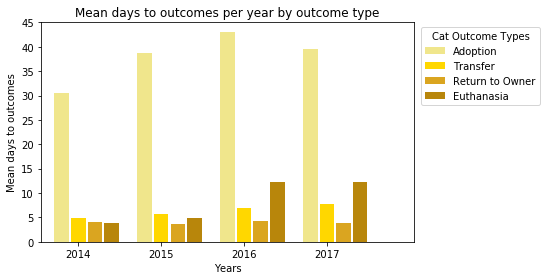

In [16]:
#Chart days from intake to outcome by outcome type

outcomeTypes = ["Adoption","Transfer","Return to Owner","Euthanasia"]

colorCnt = 0
w=0
plt.figure(figsize=(6,4))

for iType in outcomeTypes:
    IOdogs_df = dogs_df[dogs_df["Outcome Type"]==iType]
    IOdogsYrGrp = IOdogs_df.groupby(["Year_outcome"], as_index=False)
    IOdogsDaysCnt = IOdogsYrGrp["IODays"].mean()
    IOdogsYears = IOdogsDaysCnt["Year_outcome"]
    IOdogCnt = IOdogsDaysCnt["IODays"]
    print(f"{iType} {IOdogsDaysCnt}")  
    x_axis = np.arange(0, len(dogsYears), 1)
   
    plt.bar(x_axis+w, IOdogCnt,width=0.175,color=dogColors[colorCnt],align='center', label=iType)
     
    colorCnt += 1
    w+=0.2

lgd=plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1, title="Dog Outcome Types") 

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value+0.2 for value in x_axis]
plt.xticks(tick_locations, dogsYears)

# Set the limits of the x axis
plt.xlim(-.25, len(x_axis)+.25)

# Set the limits of the y axis
plt.ylim(0, 45)

# Give the chart a title, x label, and y label
plt.title(f"Mean days to outcomes per year by outcome type")
plt.xlabel("Years")
plt.ylabel("Mean Days to Outcome")

plt.tight_layout()
plt.savefig("figures/Days_Outcomes_Dog_Year.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


# --- Cats  ---
colorCnt = 0
w=0
plt.figure(figsize=(6,4))

for iType in outcomeTypes:
    IOcats_df = cats_df[cats_df["Outcome Type"]==iType]
    IOcatsYrGrp = IOcats_df.groupby(["Year_outcome"], as_index=False)
    IOcatsDaysCnt = IOcatsYrGrp["IODays"].mean()
    IOcatsYears = IOcatsDaysCnt["Year_outcome"]
    IOcatCnt = IOcatsDaysCnt["IODays"]
    print(f"{iType} {IOcatsDaysCnt}")   
    x_axis = np.arange(0, len(catsYears), 1)
   
    plt.bar(x_axis+w, IOcatCnt,width=0.175,color=catColors[colorCnt],align='center', label=iType)
    colorCnt += 1
    w+=0.2

lgd=plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1, title="Cat Outcome Types") 

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value+0.2 for value in x_axis]
plt.xticks(tick_locations, IOcatsYears)

# Set the limits of the x axis
plt.xlim(-.25, len(x_axis)+.25)

# Set the limits of the y axis
plt.ylim(0, 45)

# Give the chart a title, x label, and y label
plt.title(f"Mean days to outcomes per year by outcome type")
plt.xlabel("Years")
plt.ylabel("Mean days to outcomes")

plt.tight_layout()
plt.savefig("figures/Days_Outcomes_Cat_Year.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [17]:
purebred_df = df[df["Purebred_intake"]==1]
purebred_df.head()

,Animal ID,Name_intake,DateTime_intake,Found Location,Intake Type,Intake Condition,Animal Type_intake,Sex upon Intake,Age upon Intake,Breed_intake,...,Sex_outcome,Female_outcome,Male_outcome,SpayNeuter_outcome,Purebred_outcome,NumAge_outcome,AgeUnits_outcome,AgeDays_outcome,Intake Outcome Days,IODays
28,A678576,Han Solo,2014-05-10 13:27:00,Ih 35 And Riverside Dr in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Miniature Pinscher,...,Male,0.0,1.0,No,1,2.0,year,730.0,6 days 19:05:00.000000000,6.0
123,A738363,Sadie,2016-11-13 15:38:00,3300 Killingsworth in Travis (TX),Stray,Normal,Dog,Spayed Female,8 years,Beagle,...,Female,1.0,0.0,Yes,1,8.0,year,2920.0,0 days 03:07:00.000000000,0.0
140,A545301,Audie,2015-08-04 14:13:00,Austin (TX),Owner Surrender,Normal,Cat,Spayed Female,8 years,Maine Coon,...,Female,1.0,0.0,Yes,1,8.0,year,2920.0,19 days 04:28:00.000000000,19.0
161,A735361,Maya,2016-09-23 13:28:00,5400 Pecan Brook in Austin (TX),Stray,Normal,Dog,Spayed Female,2 years,Labrador Retriever,...,Female,1.0,0.0,Yes,1,2.0,year,730.0,24 days 10:32:00.000000000,24.0
214,A708837,Yaya Annie,2015-08-01 12:21:00,9802 Roxanna Drive in Austin (TX),Stray,Nursing,Cat,Intact Female,1 year,Domestic Medium Hair,...,Female,1.0,0.0,Yes,1,1.0,year,365.0,57 days 02:49:00.000000000,57.0


In [18]:
purebredDogGrp_df = purebred_df[purebred_df["Animal Type_intake"]=="Dog"].groupby(["Breed_intake"], as_index=False)
purebredDogCnt_df=purebredDogGrp_df["Animal ID"].count()
sort_purebredDogCnt_df = purebredDogCnt_df.sort_values("Animal ID", ascending=False)[:10]
sort_purebredDogCnt_df


,Breed_intake,Animal ID
81,Labrador Retriever,143
103,Pit Bull,142
43,Chihuahua Shorthair,139
65,German Shepherd,133
119,Shih Tzu,91
50,Dachshund,81
113,Rottweiler,64
28,Boxer,64
120,Siberian Husky,62
8,Australian Cattle Dog,60


In [19]:
# Percent of purebred 
pctPurebredDogs = (len(purebred_df[purebred_df["Animal Type_intake"]=="Dog"])/len(dogs_df))
pctPurebredCats = (len(purebred_df[purebred_df["Animal Type_intake"]=="Cat"])/len(cats_df))
print(f"The percent of dogs that are purebred is: " +"{:.2%}".format(pctPurebredDogs) )
print(f"The percent of cats that are purebred is: " +"{:.2%}".format(pctPurebredCats) )

The percent of dogs that are purebred is: 6.97%
The percent of cats that are purebred is: 2.31%


C:\Users\marya\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


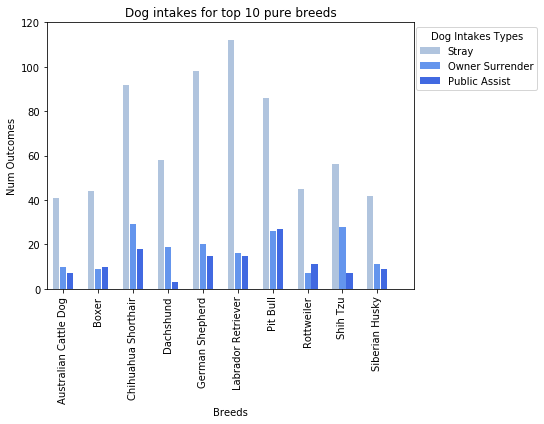

In [20]:

# --- Intakes top 10 Pure bred by intake  ---
colorCnt = 0
w=0
plt.figure(figsize=(6,6))
bintakeTypes = ["Stray","Owner Surrender","Public Assist"]
breeds = sort_purebredDogCnt_df["Breed_intake"]
b1dogs_df = pd.DataFrame(dogs_df[dogs_df["Breed_intake"].isin(breeds)])


for iType in bintakeTypes:
    bdogs_df = b1dogs_df[dogs_df["Intake Type"]==iType]
    dogsBreedGrp = bdogs_df.groupby(["Breed_intake"], as_index=False)
    dogsBreedCnt = dogsBreedGrp["Animal ID"].count()
    dogsBreeds = dogsBreedCnt["Breed_intake"]
    dogBCnt = dogsBreedCnt["Animal ID"]
    
    x_axis = np.arange(0, len(dogsBreeds), 1)
   
    plt.bar(x_axis+w, dogBCnt,width=0.175,color=dogColors[colorCnt],align='center', label=iType)
    colorCnt += 1
    w+=0.2

lgd=plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1, title="Dog Intakes Types") 

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value+0.2 for value in x_axis]
plt.xticks(tick_locations, dogsBreeds,rotation='vertical')

# Set the limits of the x axis
plt.xlim(-.25, len(x_axis)+.25)

# Set the limits of the y axis
plt.ylim(0, 120)

# Give the chart a title, x label, and y label
plt.title(f"Dog intakes for top 10 pure breeds")
plt.xlabel("Breeds")
plt.ylabel("Num Outcomes")

plt.tight_layout()
plt.savefig("figures/Intakes_Dog_Breed.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

C:\Users\marya\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


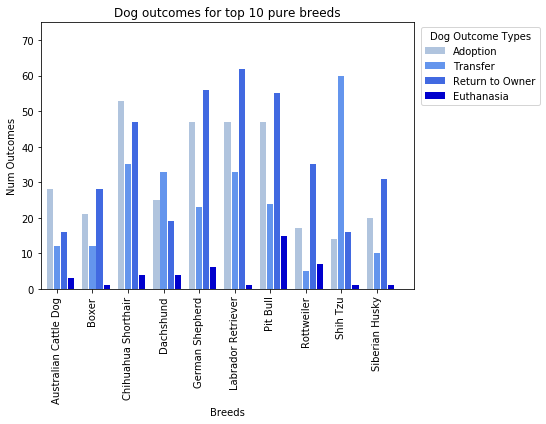

In [21]:

# --- Pure bred by intake  ---
colorCnt = 0
w=0
plt.figure(figsize=(6,6))

breeds = sort_purebredDogCnt_df["Breed_intake"]
b1dogs_df = dogs_df[dogs_df["Breed_intake"].isin(breeds)]

for iType in outcomeTypes:
    bdogs_df = b1dogs_df[dogs_df["Outcome Type"]==iType]
    dogsBreedGrp = bdogs_df.groupby(["Breed_outcome"], as_index=False)
    dogsBreedCnt = dogsBreedGrp["Animal ID"].count()
    dogsBreeds = dogsBreedCnt["Breed_outcome"]
    dogBCnt = dogsBreedCnt["Animal ID"]
    
    x_axis = np.arange(0, len(dogsBreeds), 1)
   
    plt.bar(x_axis+w, dogBCnt,width=0.175,color=dogColors[colorCnt],align='center', label=iType)
    colorCnt += 1
    w+=0.2

lgd=plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1, title="Dog Outcome Types") 

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value+0.2 for value in x_axis]
plt.xticks(tick_locations, dogsBreeds,rotation='vertical')

# Set the limits of the x axis
plt.xlim(-.25, len(x_axis)+.25)

# Set the limits of the y axis
plt.ylim(0, 75)

# Give the chart a title, x label, and y label
plt.title(f"Dog outcomes for top 10 pure breeds")
plt.xlabel("Breeds")
plt.ylabel("Num Outcomes")

plt.tight_layout()
plt.savefig("figures/Outcomes_Dog_Breed.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

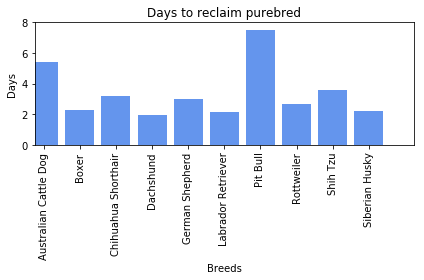

In [22]:
#Time for strays to be claimed by owner

#convert intake outcome days to numerical value for calculations
def get_days_length(val):
    val = str(val)
    days = re.findall('\d*',val)[0]
    return days

rdogs_df = b1dogs_df[b1dogs_df["Outcome Type"]=="Return to Owner"]

rdogsGrp = rdogs_df.groupby(["Breed_outcome"], as_index=False)
rdogsBreedCnt = rdogsGrp["IODays"].mean()
rdogsBreeds = rdogsBreedCnt["Breed_outcome"]
rdogsCnt = rdogsBreedCnt["IODays"]
    
x_axis = np.arange(0, len(rdogsBreeds), 1)
   
plt.bar(x_axis, rdogsCnt,color="cornflowerblue",align='center', label=iType)

#lgd=plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1, title="Dog Outcome Types") 

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, rdogsBreeds,rotation='vertical')

# Set the limits of the x axis
plt.xlim(-.25, len(x_axis)+.25)

# Set the limits of the y axis
plt.ylim(0, 8)

# Give the chart a title, x label, and y label
plt.title(f"Days to reclaim purebred")
plt.xlabel("Breeds")
plt.ylabel("Days")

plt.tight_layout()
plt.savefig("figures/DaysReclaim_Breed.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


In [23]:
rdogsBreedCnt

,Breed_outcome,IODays
0,Australian Cattle Dog,5.437500
1,Boxer,2.285714
2,Chihuahua Shorthair,3.170213
3,Dachshund,1.947368
4,German Shepherd,3.000000
5,Labrador Retriever,2.112903
6,Pit Bull,7.472727
7,Rottweiler,2.657143
8,Shih Tzu,3.562500
9,Siberian Husky,2.193548


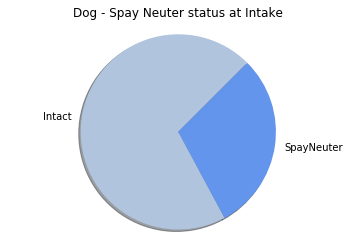

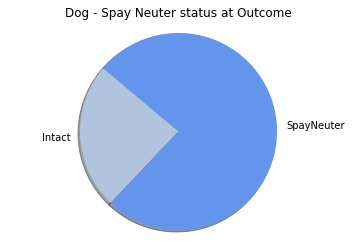

In [24]:
#Change of spay neuter --Dogs

fixedInDogGrp=dogs_df.groupby(["SpayNeuter_intake"])
fixedInDogCnt = fixedInDogGrp["Animal ID"].count()/len(dogs_df)
fixedOutDogGrp=dogs_df.groupby(["SpayNeuter_outcome"])
fixedOutDogCnt = fixedOutDogGrp["Animal ID"].count()/len(dogs_df)
#fixedOutDogCnt
plt.pie(fixedInDogCnt,explode=(0,0), labels=["Intact","SpayNeuter"], colors=["lightsteelblue","cornflowerblue"] , shadow=True, startangle=45)
plt.axis("equal")
plt.title(f"Dog - Spay Neuter status at Intake")
plt.savefig("figures/SpayNeuter_intake_Dog.png")
plt.show()

plt.pie(fixedOutDogCnt,explode=(0,0), labels=["Intact","SpayNeuter"], colors=["lightsteelblue","cornflowerblue"], shadow=True, startangle=140 )
plt.axis("equal")
plt.title(f"Dog - Spay Neuter status at Outcome")
plt.savefig("figures/SpayNeuter_outcome_Dog.png")            
plt.show()


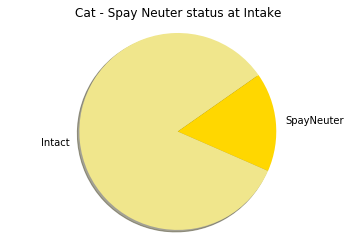

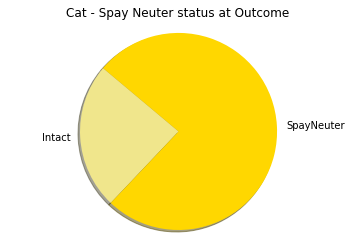

In [25]:
#Change of spay neuter --Cats

fixedInCatGrp=cats_df.groupby(["SpayNeuter_intake"])
fixedInCatCnt = fixedInCatGrp["Animal ID"].count()
fixedOutCatGrp=dogs_df.groupby(["SpayNeuter_outcome"])
fixedOutCatCnt = fixedOutCatGrp["Animal ID"].count()
#fixedOutCatCnt
plt.pie(fixedInCatCnt,explode=(0,0), labels=["Intact","SpayNeuter"], colors=["khaki","gold"] , shadow=True, startangle=35)
plt.axis("equal")
plt.title(f"Cat - Spay Neuter status at Intake")
plt.savefig("figures/SpayNeuter_intake_Cat.png")
plt.show()

plt.pie(fixedOutCatCnt,explode=(0,0), labels=["Intact","SpayNeuter"], colors=["khaki","gold"], shadow=True, startangle=140 )
plt.axis("equal")
plt.title(f"Cat - Spay Neuter status at Outcome")
plt.savefig("figures/SpayNeuter_outcome_Cat.png" )           
plt.show()